In [40]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io
import matplotlib.pyplot as plt

In [22]:
end = datetime.datetime(2020,12,1)
start = datetime.datetime(2010,6,1)

In [23]:
spy = yf.download('SPY', start=start, end=end)
spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-01,108.349998,109.949997,107.370003,107.529999,86.498352,277909400
2010-06-02,108.080002,110.339996,107.510002,110.330002,88.750710,240243700
2010-06-03,110.650002,111.059998,109.580002,110.709999,89.056366,226618300
2010-06-04,108.610001,109.330002,106.459999,106.820000,85.927200,398475600
2010-06-07,107.199997,107.610001,105.410004,105.489998,84.857361,264609100
...,...,...,...,...,...,...
2020-11-23,357.279999,358.820007,354.869995,357.459991,354.780731,63230600
2020-11-24,360.209991,363.809998,359.290009,363.220001,360.497559,62415900
2020-11-25,363.130005,363.160004,361.480011,362.660004,359.941772,45330900


In [24]:
spy_max = spy[['High']]
spy_max = spy_max.rolling(window=50).max()
spy_max = spy_max.rename(columns={'High':'Max_50day'})
spy_max

,Max_50day
Date,
2010-06-01,NaN
2010-06-02,NaN
2010-06-03,NaN
2010-06-04,NaN
2010-06-07,NaN
...,...
2020-11-23,364.380005
2020-11-24,364.380005
2020-11-25,364.380005


In [26]:
spy = pd.concat([spy, spy_max], axis=1)
spy

,Open,High,Low,Close,Adj Close,Volume,Max_50day
Date,,,,,,,
2010-06-01,108.349998,109.949997,107.370003,107.529999,86.498352,277909400,NaN
2010-06-02,108.080002,110.339996,107.510002,110.330002,88.750710,240243700,NaN
2010-06-03,110.650002,111.059998,109.580002,110.709999,89.056366,226618300,NaN
2010-06-04,108.610001,109.330002,106.459999,106.820000,85.927200,398475600,NaN
2010-06-07,107.199997,107.610001,105.410004,105.489998,84.857361,264609100,NaN
...,...,...,...,...,...,...,...
2020-11-23,357.279999,358.820007,354.869995,357.459991,354.780731,63230600,364.380005
2020-11-24,360.209991,363.809998,359.290009,363.220001,360.497559,62415900,364.380005
2020-11-25,363.130005,363.160004,361.480011,362.660004,359.941772,45330900,364.380005


In [28]:
spy = spy.reset_index()
spy = spy[spy['Date'] >= datetime.datetime(2011,1,1)]
spy

,Date,Open,High,Low,Close,Adj Close,Volume,Max_50day
150,2011-01-03,126.709999,127.599998,125.699997,127.050003,103.779396,138725200,127.599998
151,2011-01-04,127.330002,127.370003,126.190002,126.980003,103.722198,137409700,127.599998
152,2011-01-05,126.580002,127.720001,126.459999,127.639999,104.261322,133975300,127.720001
153,2011-01-06,127.690002,127.830002,127.010002,127.389999,104.057114,122519000,127.830002
154,2011-01-07,127.559998,127.769997,126.150002,127.139999,103.852882,156034600,127.830002
...,...,...,...,...,...,...,...,...
2640,2020-11-23,357.279999,358.820007,354.869995,357.459991,354.780731,63230600,364.380005
2641,2020-11-24,360.209991,363.809998,359.290009,363.220001,360.497559,62415900,364.380005
2642,2020-11-25,363.130005,363.160004,361.480011,362.660004,359.941772,45330900,364.380005
2643,2020-11-27,363.839996,364.179993,362.579987,363.670013,360.944214,28514100,364.380005


In [29]:
spy['Dip_perc'] = ((spy['Max_50day'] - spy['Close'])/spy['Max_50day'])*100
spy

,Date,Open,High,Low,Close,Adj Close,Volume,Max_50day,Dip_perc
150,2011-01-03,126.709999,127.599998,125.699997,127.050003,103.779396,138725200,127.599998,0.431031
151,2011-01-04,127.330002,127.370003,126.190002,126.980003,103.722198,137409700,127.599998,0.485890
152,2011-01-05,126.580002,127.720001,126.459999,127.639999,104.261322,133975300,127.720001,0.062638
153,2011-01-06,127.690002,127.830002,127.010002,127.389999,104.057114,122519000,127.830002,0.344209
154,2011-01-07,127.559998,127.769997,126.150002,127.139999,103.852882,156034600,127.830002,0.539781
...,...,...,...,...,...,...,...,...,...
2640,2020-11-23,357.279999,358.820007,354.869995,357.459991,354.780731,63230600,364.380005,1.899120
2641,2020-11-24,360.209991,363.809998,359.290009,363.220001,360.497559,62415900,364.380005,0.318350
2642,2020-11-25,363.130005,363.160004,361.480011,362.660004,359.941772,45330900,364.380005,0.472035
2643,2020-11-27,363.839996,364.179993,362.579987,363.670013,360.944214,28514100,364.380005,0.194849


In [42]:
entry_points = spy[spy['Dip_perc'] >= 5]
entry_points['Diff'] = entry_points['Date'].diff()/np.timedelta64(1, 'D')
entry_points = entry_points.replace(np.nan, 1)
entry_points

C:\Users\harta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open,High,Low,Close,Adj Close,Volume,Max_50day,Dip_perc,Diff
200,2011-03-16,128.149994,128.570007,125.279999,126.180000,103.068718,468670300,134.690002,6.318214,1.0
201,2011-03-17,128.000000,128.389999,127.099998,127.849998,104.432838,254303700,134.690002,5.078331,1.0
202,2011-03-18,128.839996,128.880005,127.510002,127.760002,104.812660,230435400,134.690002,5.145148,1.0
256,2011-06-06,130.089996,130.360001,128.869995,129.039993,105.862778,179951200,137.179993,5.933809,80.0
257,2011-06-07,129.699997,130.070007,128.850006,128.960007,105.797180,161660500,137.179993,5.992117,1.0
...,...,...,...,...,...,...,...,...,...,...
2622,2020-10-28,332.100006,338.250000,326.130005,326.660004,324.211609,127094300,358.750000,8.944947,1.0
2623,2020-10-29,326.910004,333.399994,325.089996,329.980011,327.506714,90597700,358.750000,8.019509,1.0
2624,2020-10-30,328.279999,329.690002,322.600006,326.540009,324.092499,120287300,358.750000,8.978395,1.0
2625,2020-11-02,330.200012,332.359985,327.239990,330.200012,327.725098,86068300,358.750000,7.958185,3.0


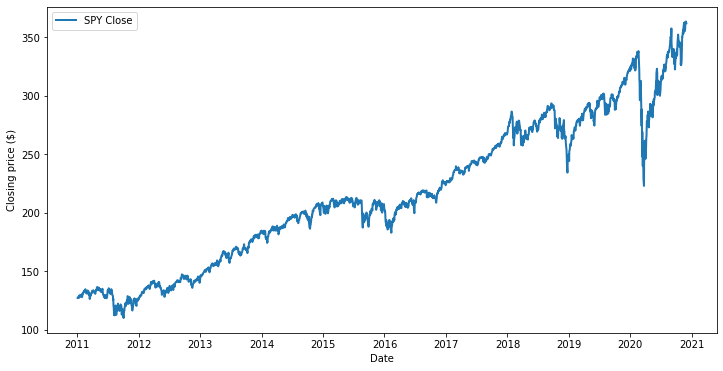

In [35]:
#The size for our chart:
plt.figure(figsize = (12,6))

#Plotting price and SMA lines:
plt.plot(spy.Date, spy.Close, label='SPY Close', linewidth = 2)

#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.show()